# MMPose with RTMPose

- baseline

![baseline: RTMPose-tiny](https://user-images.githubusercontent.com/66227028/242804165-512cb56c-3d6c-4c0d-ab2a-329bdd1994f7.png)

In [1]:
!mim list | grep mm

mmagic          1.0.1      https://github.com/open-mmlab/mmagic
mmcv            2.0.0rc4   https://github.com/open-mmlab/mmcv
mmdet           3.0.0      /home/louzekun/miniconda3/envs/mmlab2/lib/python3.9/site-packages
mmengine        0.7.3      https://github.com/open-mmlab/mmengine
mmpose          1.0.0      https://github.com/open-mmlab/mmpose
mmpretrain      1.0.0rc8   https://github.com/open-mmlab/mmpretrain
mmsegmentation  1.0.0      https://github.com/open-mmlab/mmsegmentation


In [1]:
PROJECT_ROOT = '/home/louzekun/projects/mmlab/mmpose'

import os
os.chdir(PROJECT_ROOT)
os.getcwd()

'/mnt/data/ai4phys/louzekun/projects/mmlab/mmpose'

In [2]:
!pwd

/mnt/data/ai4phys/louzekun/projects/mmlab/mmpose


# 训练

- config changes
```python
data_root = '/home/louzekun/dataset/Ear210_Keypoint_Dataset_coco_2/'
num_workers = 8  # null
```

In [10]:
# !python /home/louzekun/projects/mmlab/src_code/mmpose/tools/train.py \
#     ./hw/rtmpose-s-ear.py \
#     --work-dir ./hw/MMPose_RTMPose/
!cat /home/louzekun/projects/mmlab/mmpose/hw/MMPose_RTMPose/20230604_165733/20230604_165733.log | tail -16

2023/06/04 22:47:10 - mmengine - INFO - Exp name: rtmpose-s-ear_20230604_165733
2023/06/04 22:47:10 - mmengine - INFO - Epoch(train) [300][6/6]  lr: 2.000116e-04  eta: 0:00:00  time: 5.944535  data_time: 5.666284  memory: 473  loss: 0.043111  loss_kpt: 0.043111  acc_pose: 1.000000
2023/06/04 22:47:10 - mmengine - INFO - Saving checkpoint at 300 epochs
2023/06/04 22:47:22 - mmengine - INFO - Epoch(val) [300][1/6]    eta: 0:00:31  time: 1.324805  data_time: 1.177035  memory: 179  
2023/06/04 22:47:22 - mmengine - INFO - Epoch(val) [300][2/6]    eta: 0:00:13  time: 1.332356  data_time: 1.181000  memory: 179  
2023/06/04 22:47:22 - mmengine - INFO - Epoch(val) [300][3/6]    eta: 0:00:06  time: 1.208743  data_time: 1.055100  memory: 179  
2023/06/04 22:47:23 - mmengine - INFO - Epoch(val) [300][4/6]    eta: 0:00:03  time: 1.206814  data_time: 1.055512  memory: 179  
2023/06/04 22:47:23 - mmengine - INFO - Epoch(val) [300][5/6]    eta: 0:00:01  time: 1.210527  data_time: 1.057261  memory: 17

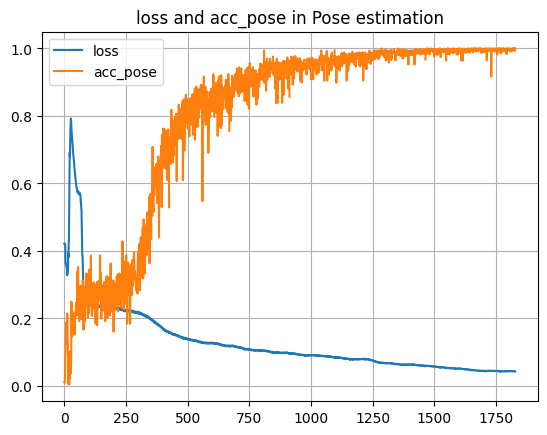

In [11]:
import matplotlib.pyplot as plt
import json
# scalars is {"lr": 4e-08, "data_time": 98.82540941238403, "loss": 0.4217134714126587, "loss_kpt": 0.4217134714126587, "acc_pose": 0.010416666666666666, "time": 101.63738322257996, "epoch": 1, "memory": 1496, "step": 1}
# plot loss, acc_pose against step
log_scalars = '/home/louzekun/projects/mmlab/mmpose/hw/MMPose_RTMPose/20230604_165733/vis_data/scalars.json'
with open(log_scalars) as f:
    lines = f.readlines()
    scalars = [json.loads(line) for line in lines]
loss = [entry.get('loss') for entry in scalars]
acc_pose = [entry.get('acc_pose') for entry in scalars]
plt.plot(loss, label='loss')
plt.plot(acc_pose, label='acc_pose')
plt.title('loss and acc_pose in Pose estimation')
plt.grid()
plt.legend()
# plt.yscale('log')
plt.show()

# 测试

In [12]:
# !python /home/louzekun/projects/mmlab/src_code/mmpose/tools/test.py \
#     ./hw/rtmpose-s-ear.py \
#     ./hw/MMPose_RTMPose/best_PCK_epoch_300.pth \
#     --work-dir ./hw/MMPose_RTMPose/
!cat /home/louzekun/projects/mmlab/mmpose/hw/MMPose_RTMPose/20230604_224951/20230604_224951.log | tail -n 16

 -------------------- 
2023/06/04 22:50:07 - mmengine - WARNING - The prefix is not set in metric class PCKAccuracy.
2023/06/04 22:50:07 - mmengine - WARNING - The prefix is not set in metric class AUC.
2023/06/04 22:50:07 - mmengine - WARNING - The prefix is not set in metric class NME.
2023/06/04 22:50:11 - mmengine - INFO - Load checkpoint from ./hw/MMPose_RTMPose/best_PCK_epoch_300.pth
2023/06/04 22:50:23 - mmengine - INFO - Epoch(test) [1/6]    eta: 0:00:58  time: 11.799404  data_time: 9.531938  memory: 112  
2023/06/04 22:50:23 - mmengine - INFO - Epoch(test) [2/6]    eta: 0:00:24  time: 6.043223  data_time: 4.766842  memory: 112  
2023/06/04 22:50:24 - mmengine - INFO - Epoch(test) [3/6]    eta: 0:00:12  time: 4.065351  data_time: 3.179164  memory: 112  
2023/06/04 22:50:24 - mmengine - INFO - Epoch(test) [4/6]    eta: 0:00:06  time: 3.123695  data_time: 2.408846  memory: 112  
2023/06/04 22:50:24 - mmengine - INFO - Epoch(test) [5/6]    eta: 0:00:02  time: 2.537795  data_time: 

results:
```text
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.733
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  1.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.946
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.733
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.774
 Average Recall     (AR) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  1.000
 Average Recall     (AR) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.952
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.774
06/04 22:50:24 - mmengine - INFO - Evaluating PCKAccuracy (normalized by ``"bbox_size"``)...
06/04 22:50:24 - mmengine - INFO - Evaluating AUC...
06/04 22:50:24 - mmengine - INFO - Evaluating NME...
06/04 22:50:24 - mmengine - INFO - Epoch(test) [6/6]    coco/AP: 0.732748  coco/AP .5: 1.000000  coco/AP .75: 0.946390  coco/AP (M): -1.000000  coco/AP (L): 0.732748  coco/AR: 0.773810  coco/AR .5: 1.000000  coco/AR .75: 0.952381  coco/AR (M): -1.000000  coco/AR (L): 0.773810  PCK: 0.973923  AUC: 0.134637  NME: 0.042401  data_time: 1.621584  time: 2.148609
```

# 预测
- 只预测单张图片了, 视频没搞

In [14]:
!python /home/louzekun/projects/mmlab/src_code/mmpose/demo/topdown_demo_with_mmdet.py \
        ./hw/rtmdet_tiny_ear.py \
        ./hw/MMDet_RTMDet/best_coco_bbox_mAP_epoch_175.pth \
        ./hw/rtmpose-s-ear.py \
        ./hw/MMPose_RTMPose/best_PCK_epoch_300.pth \
        --input ./hw/mydata/right_ear_lr_inv.jpg \
        --output-root ./hw/MMPose_RTMPose/outputs/vis/ \
        --save-predictions \
        --device cuda:0 \
        --bbox-thr 0.5 \
        --kpt-thr 0.5 \
        --nms-thr 0.5 \
        --radius 30 \
        --thickness 3 \
        --draw-bbox \
        --draw-heatmap \
        --show-kpt-idx

Loads checkpoint by local backend from path: ./hw/MMDet_RTMDet/best_coco_bbox_mAP_epoch_175.pth
Loads checkpoint by local backend from path: ./hw/MMPose_RTMPose/best_PCK_epoch_300.pth
06/04 22:56:57 - mmengine - WARNING - `Visualizer` backend is not initialized because save_dir is None.
/home/louzekun/miniconda3/envs/mmlab2/lib/python3.9/site-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /opt/conda/conda-bld/pytorch_1659484809662/work/aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/home/louzekun/miniconda3/envs/mmlab2/lib/python3.9/site-packages/mmpose/models/heads/coord_cls_heads/rtmcc_head.py:217: UserWarning: The predicted simcc values are normalized for visualization. This may cause discrepancy between the keypoint scores and the 1D heatmaps.
  warnings.warn('The predicted simcc values are normalize

img_size=(3024, 8064), img_size_resize=(302, 806)


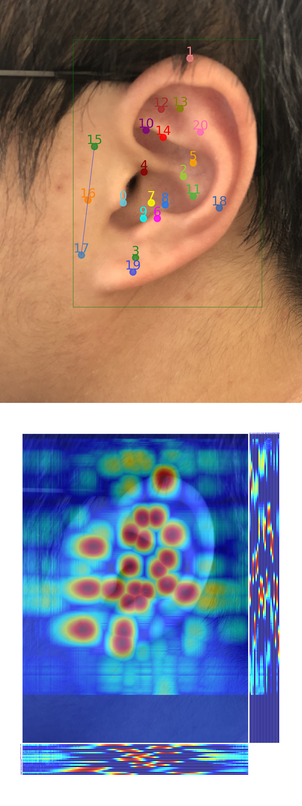

In [16]:
from PIL import Image
# load image
img_path = './hw/MMPose_RTMPose/outputs/vis/right_ear_lr_inv.jpg'
img = Image.open(img_path)
img_size = img.size
img_size_resize = tuple([i//10 for i in img_size])
print(f"{img_size=}, {img_size_resize=}")
img_resized = img.resize(img_size_resize, Image.LANCZOS)
img_resized